In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vivarium import InteractiveContext

In [2]:
sim = InteractiveContext("../src/village_simulator/simulation/specification.yaml")

In [3]:
p_0 = sim.get_population()
p_0

,tracked,y,x,feature,cumulative_dry_days,previous_day_dry,rainfall_late_growth,rainfall_mid_growth,temperature,rainfall,female_population_size,male_population_size,wheat_stores,wheat_projected_yield,wood_stores,stone_stores,bronze_stores
0,True,0,0,forest,0.0,False,0.0,0.0,NaN,NaN,0,0,0.000000,0.0,0.000000,0.000000,0.000000
1,True,1,0,forest,0.0,False,0.0,0.0,NaN,NaN,0,0,0.000000,0.0,0.000000,0.000000,0.000000
2,True,2,0,forest,0.0,False,0.0,0.0,NaN,NaN,0,0,0.000000,0.0,0.000000,0.000000,0.000000
3,True,3,0,village,0.0,False,0.0,0.0,NaN,NaN,508,492,10944.416715,10000.0,7229.202525,4806.936169,2801.113610
4,True,4,0,forest,0.0,False,0.0,0.0,NaN,NaN,0,0,0.000000,0.0,0.000000,0.000000,0.000000
5,True,0,1,forest,0.0,False,0.0,0.0,NaN,NaN,0,0,0.000000,0.0,0.000000,0.000000,0.000000
6,True,1,1,forest,0.0,False,0.0,0.0,NaN,NaN,0,0,0.000000,0.0,0.000000,0.000000,0.000000
7,True,2,1,forest,0.0,False,0.0,0.0,NaN,NaN,0,0,0.000000,0.0,0.000000,0.000000,0.000000
8,True,3,1,forest,0.0,False,0.0,0.0,NaN,NaN,0,0,0.000000,0.0,0.000000,0.000000,0.000000
9,True,4,1,forest,0.0,False,0.0,0.0,NaN,NaN,0,0,0.000000,0.0,0.000000,0.000000,0.000000


In [4]:
%%time
data = []
for _ in range(400):
    sim.step()
    temperature = sim.get_population()
    dates = pd.Series(sim._clock.time, name="date", index=temperature.index)
    data.append(pd.concat([dates, temperature], axis=1))

data = pd.concat(data)

CPU times: user 1min 24s, sys: 106 ms, total: 1min 24s
Wall time: 1min 24s


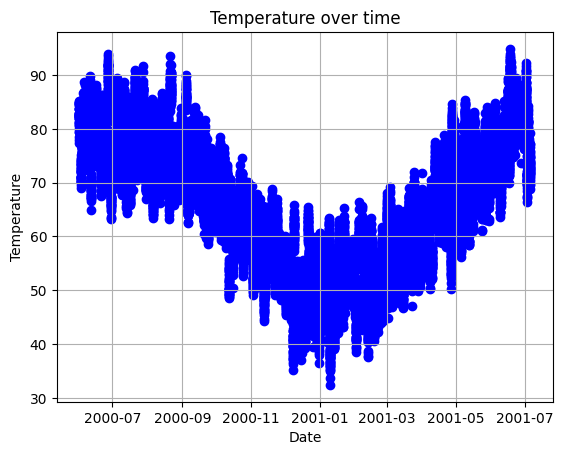

In [5]:
import matplotlib.pyplot as plt

# Sample data
x = data["date"]
y = data["temperature"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature over time')

# Show the plot
plt.grid(True)
plt.show()

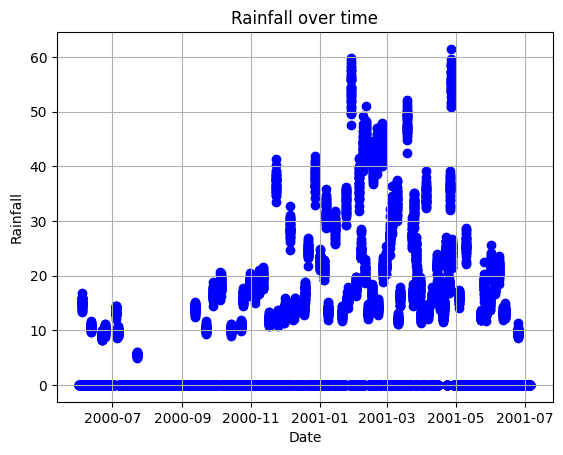

In [6]:
# Sample data
x = data["date"]
y = data["rainfall"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall over time')

# Show the plot
plt.grid(True)
plt.show()

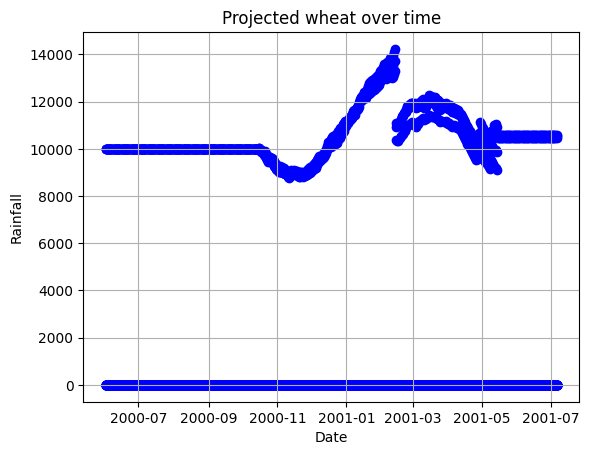

In [7]:
# Sample data
x = data["date"]
y = data["wheat_projected_yield"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Projected wheat over time')

# Show the plot
plt.grid(True)
plt.show()

In [8]:
data["rainfall"].mean()

5.143200289295755

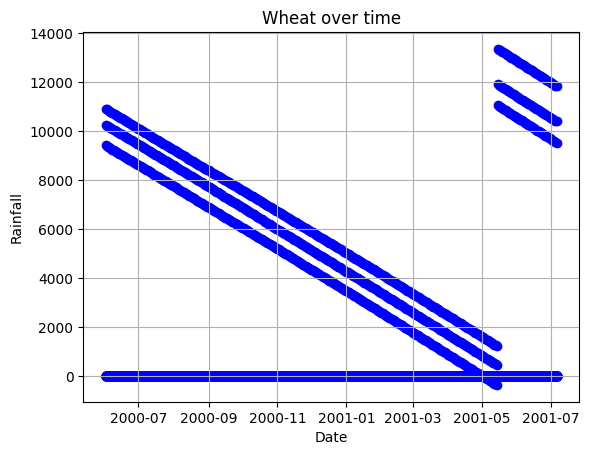

In [9]:
# Sample data
x = data["date"]
y = data["wheat_stores"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Wheat over time')

# Show the plot
plt.grid(True)
plt.show()

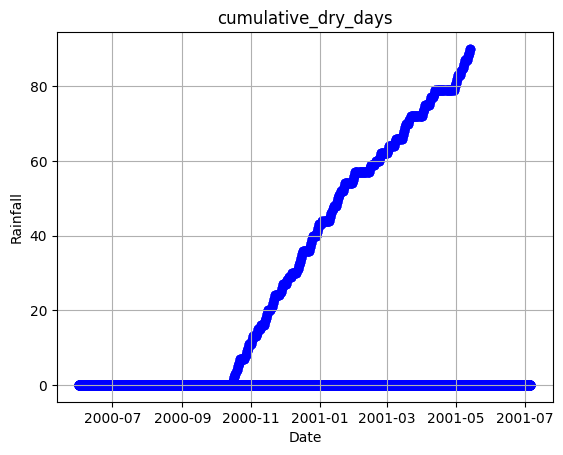

In [10]:
# Sample data
x = data["date"]
y = data["cumulative_dry_days"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('cumulative_dry_days')

# Show the plot
plt.grid(True)
plt.show()

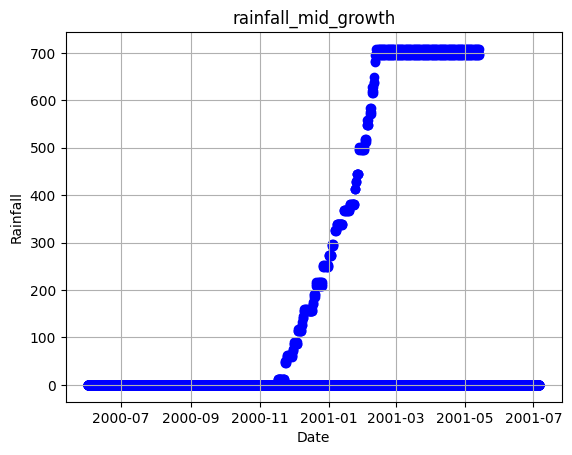

In [11]:
# Sample data
x = data["date"]
y = data["rainfall_mid_growth"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('rainfall_mid_growth')

# Show the plot
plt.grid(True)
plt.show()

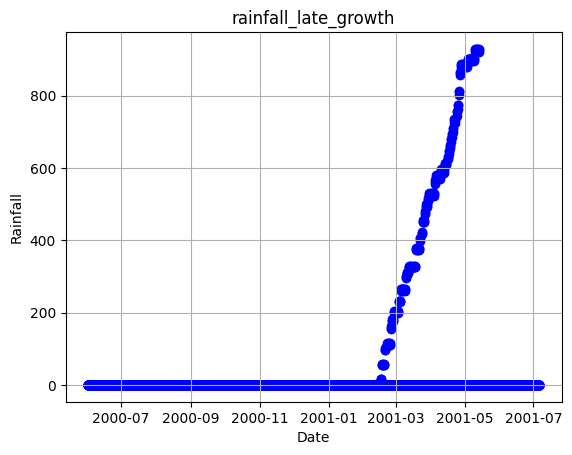

In [12]:
# Sample data
x = data["date"]
y = data["rainfall_late_growth"]

# Create a scatterplot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('rainfall_late_growth')

# Show the plot
plt.grid(True)
plt.show()